### Exploratory Data Analysis and Feature Engineering

##### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

##### Settings

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns in DataFrame
sns.set(style="whitegrid")

##### Read the Dataset

In [3]:
df = pd.read_csv("C:/Users/dell/Desktop/CarbonFootprint/data/Carbon Emission.csv")
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


##### Data Overview

In [ ]:
print("Shape:",df.shape) 
print("Columns:",df.columns.tolist()) 

df.info()
df.describe(include='all') 


Shape: (10000, 20)
Columns: ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill', 'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km', 'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


##### Checking Missing or Duplicated Values

In [4]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

##### Target Variable Distribution

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


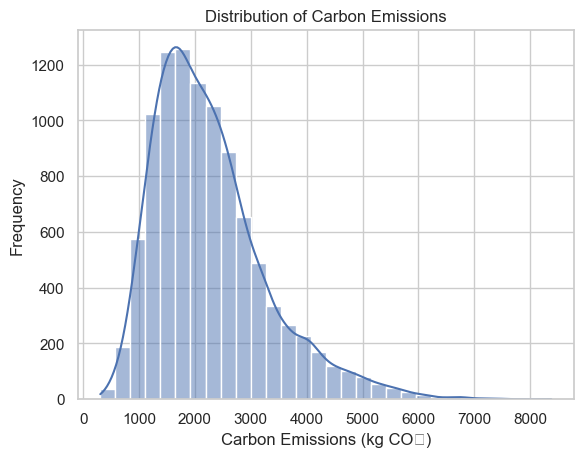

In [5]:
sns.histplot(df["CarbonEmission"], bins=30, kde=True)
plt.title("Distribution of Carbon Emissions")
plt.xlabel("Carbon Emissions (kg CO₂)")
plt.ylabel("Frequency")
plt.show()

##### Categorical Feature Distribution

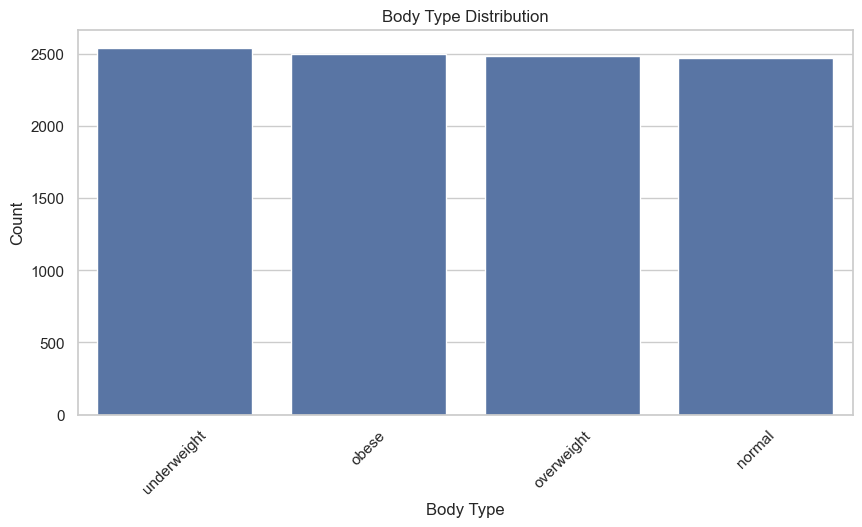

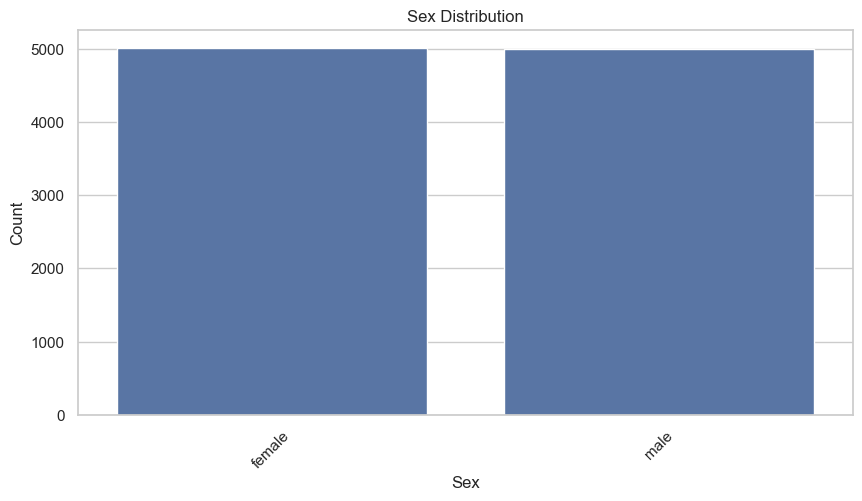

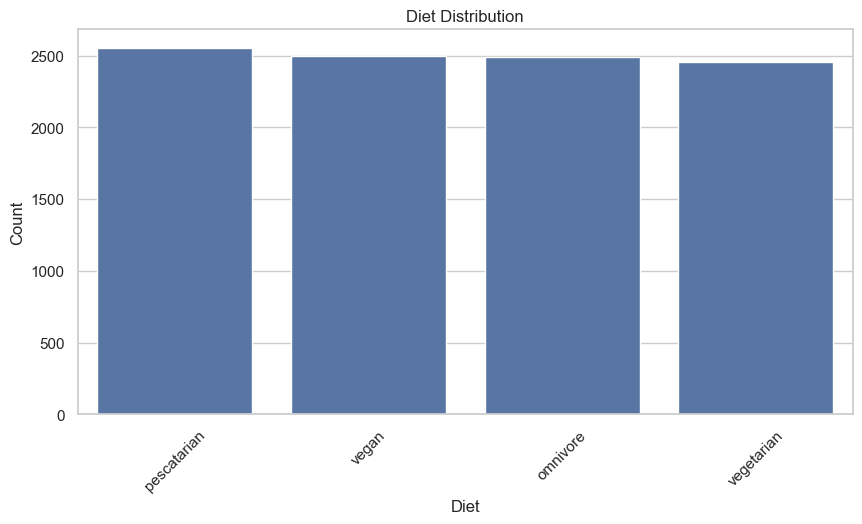

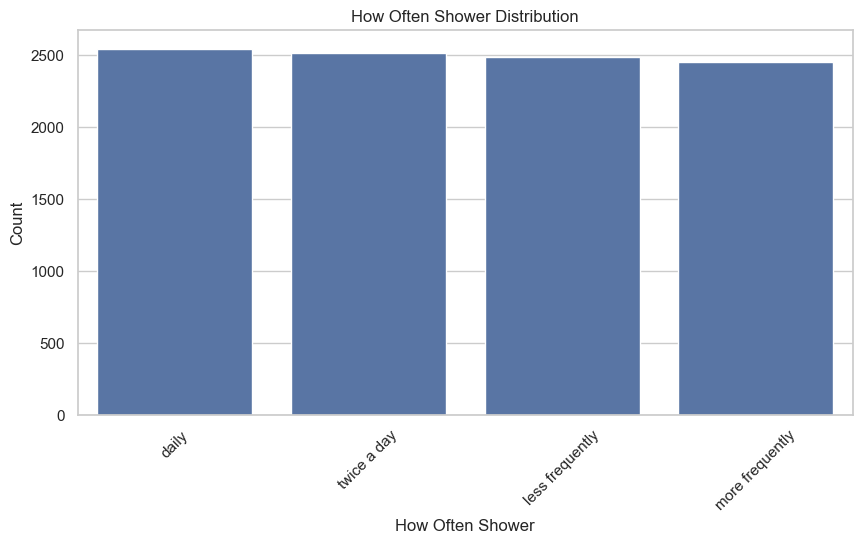

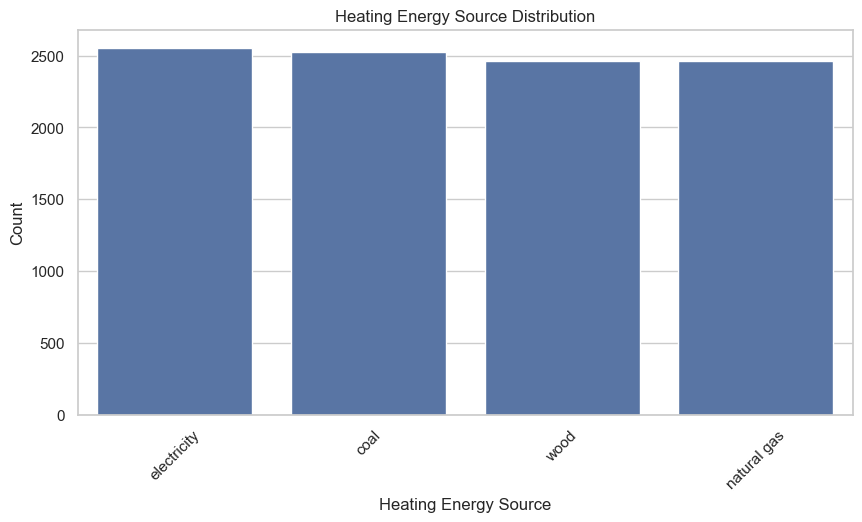

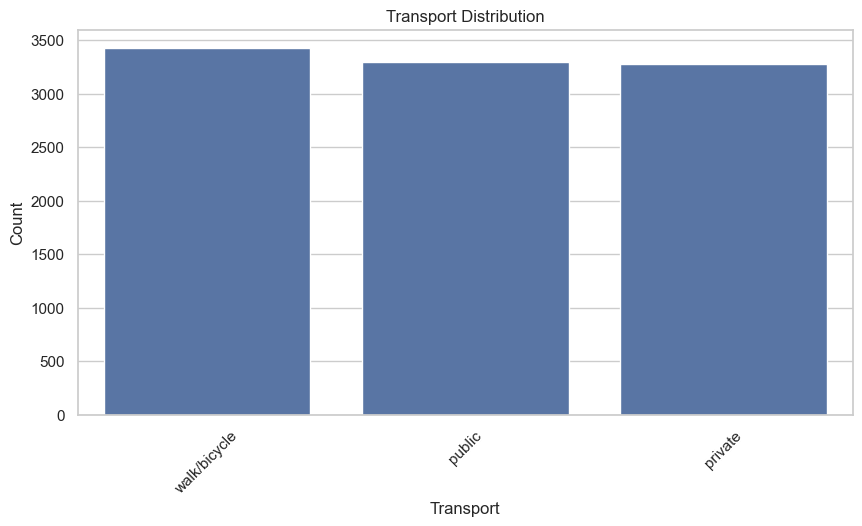

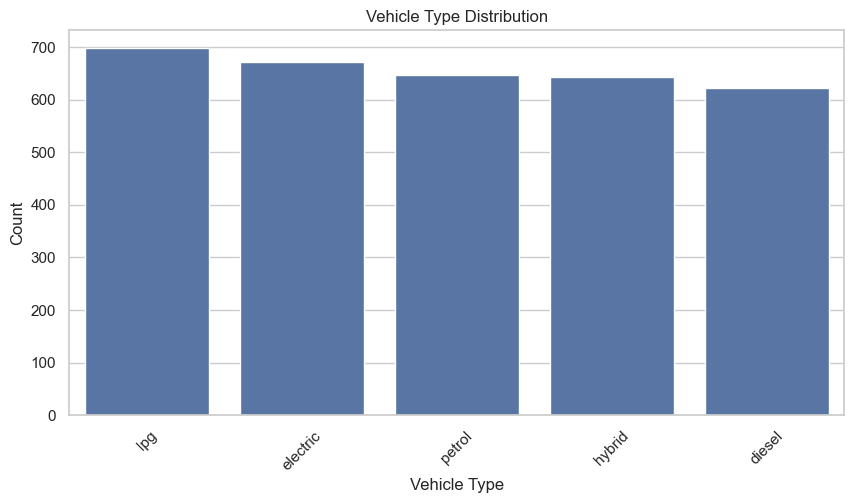

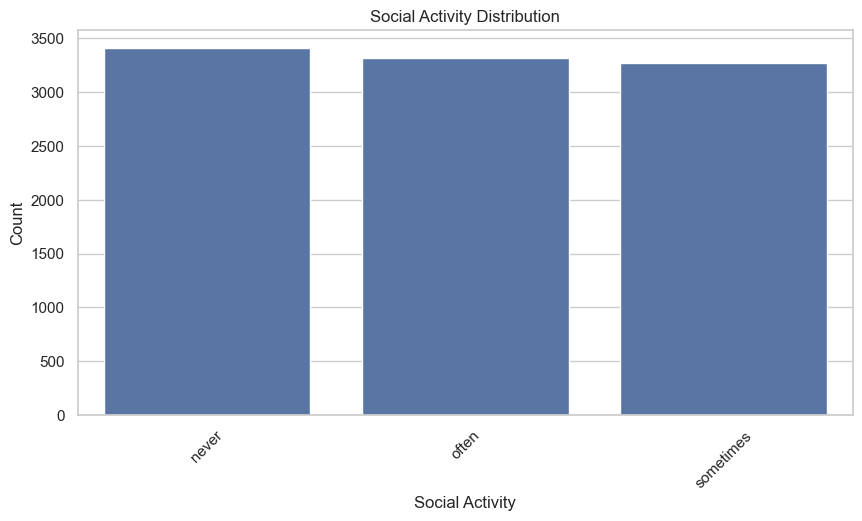

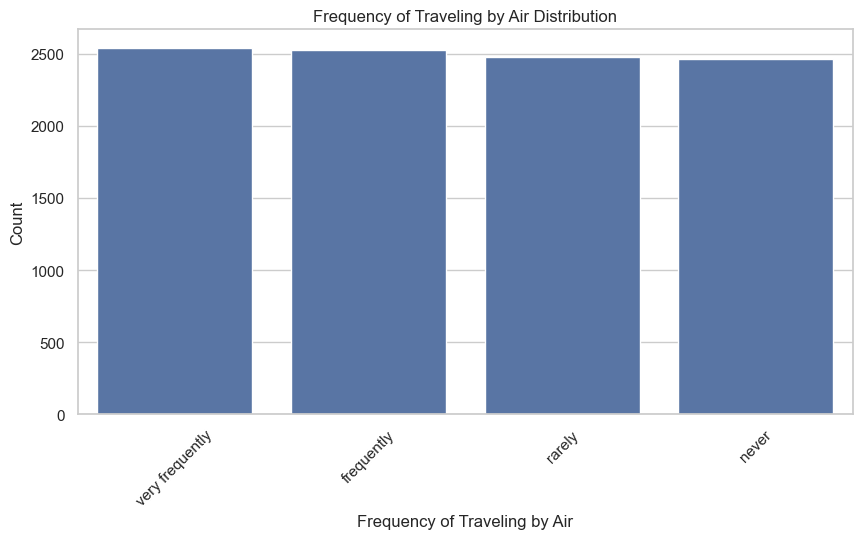

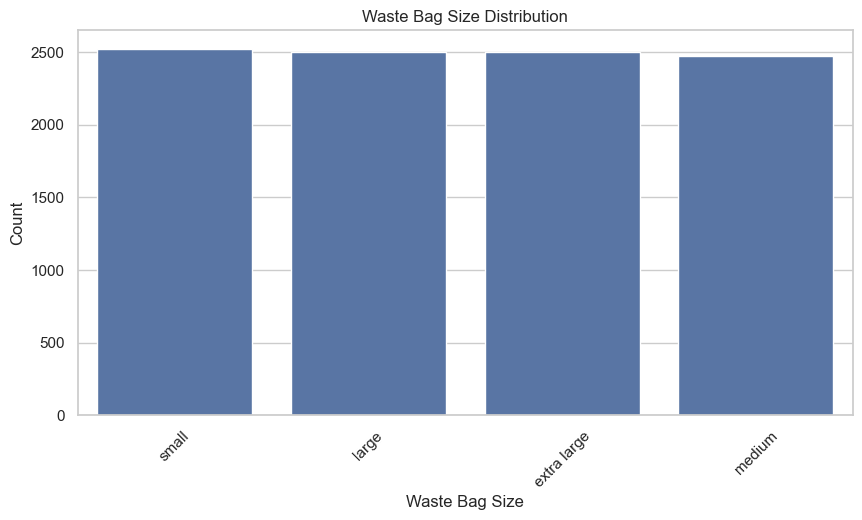

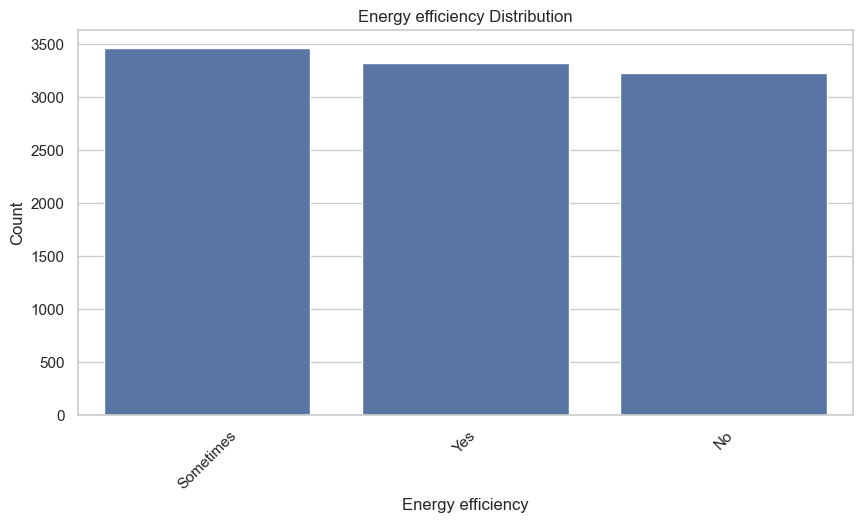

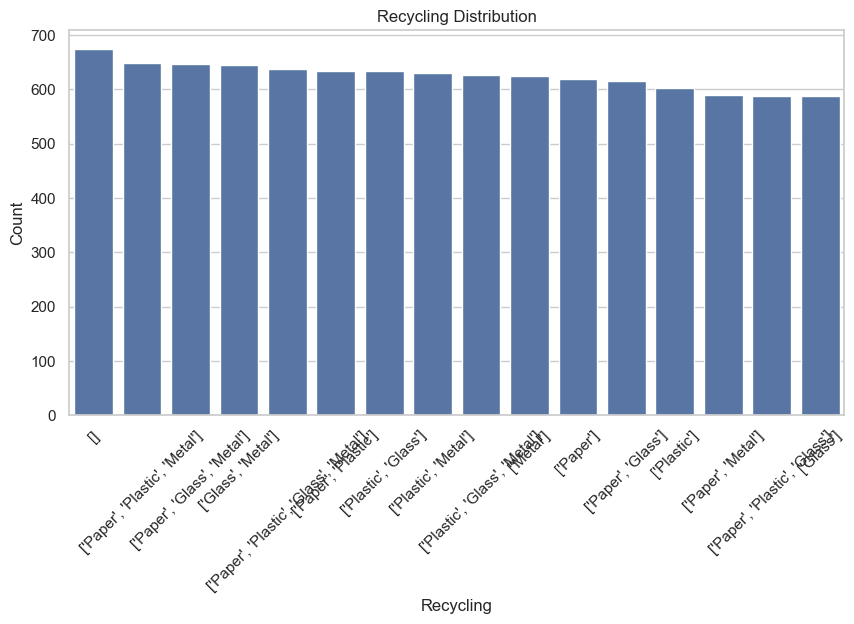

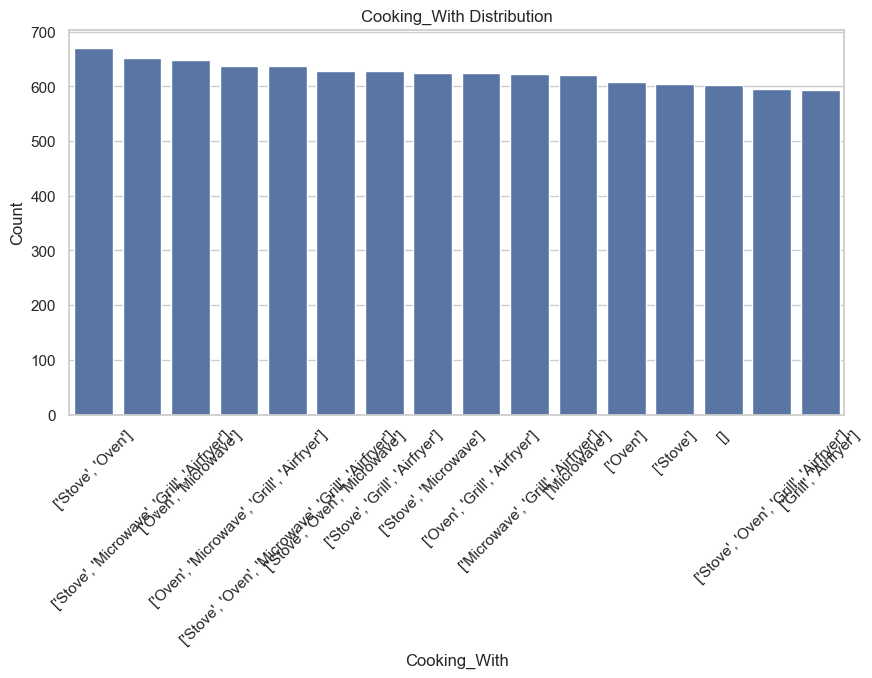

In [6]:
categorical_features =[
    "Body Type","Sex","Diet","How Often Shower","Heating Energy Source","Transport","Vehicle Type",
    "Social Activity","Frequency of Traveling by Air","Waste Bag Size","Energy efficiency", "Recycling",
    "Cooking_With"
] 

for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f"{feature} Distribution")
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

In [7]:
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")

Body Type: ['overweight' 'obese' 'underweight' 'normal']
Sex: ['female' 'male']
Diet: ['pescatarian' 'vegetarian' 'omnivore' 'vegan']
How Often Shower: ['daily' 'less frequently' 'more frequently' 'twice a day']
Heating Energy Source: ['coal' 'natural gas' 'wood' 'electricity']
Transport: ['public' 'walk/bicycle' 'private']
Vehicle Type: [nan 'petrol' 'diesel' 'hybrid' 'lpg' 'electric']
Social Activity: ['often' 'never' 'sometimes']
Frequency of Traveling by Air: ['frequently' 'rarely' 'never' 'very frequently']
Waste Bag Size: ['large' 'extra large' 'small' 'medium']
Energy efficiency: ['No' 'Sometimes' 'Yes']
Recycling: ["['Metal']" "['Paper', 'Plastic', 'Glass', 'Metal']" "['Paper']"
 "['Paper', 'Glass', 'Metal']" '[]' "['Paper', 'Plastic', 'Glass']"
 "['Glass']" "['Paper', 'Plastic']" "['Plastic']"
 "['Plastic', 'Glass', 'Metal']" "['Paper', 'Plastic', 'Metal']"
 "['Paper', 'Glass']" "['Paper', 'Metal']" "['Glass', 'Metal']"
 "['Plastic', 'Glass']" "['Plastic', 'Metal']"]
Cooking_W

##### Numerical Feature Distribution

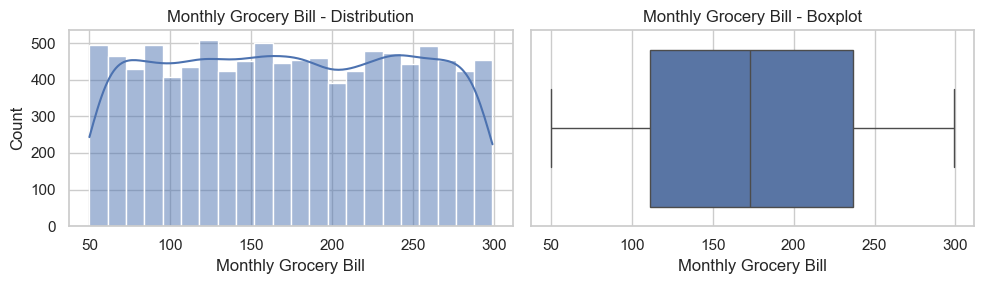

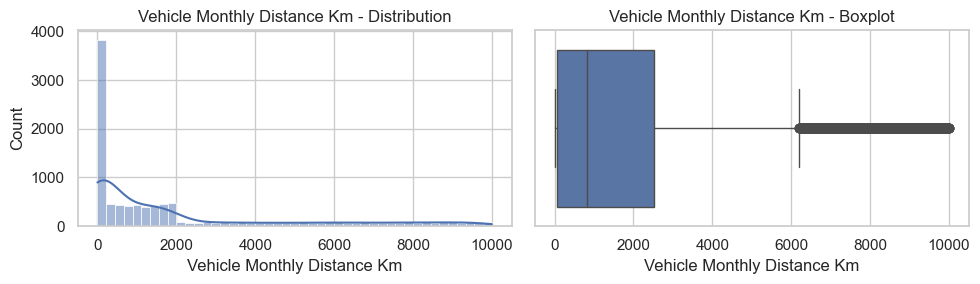

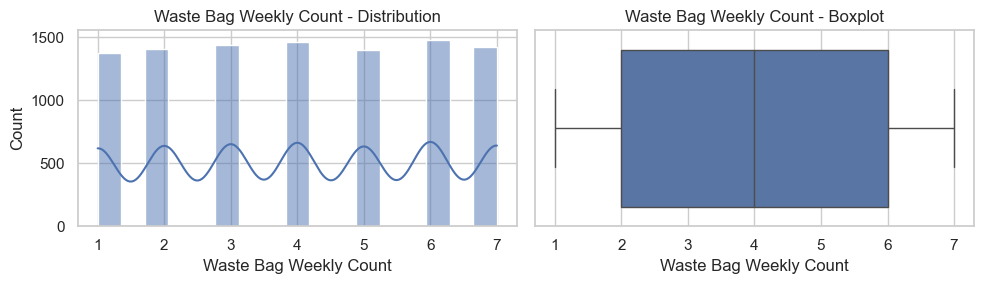

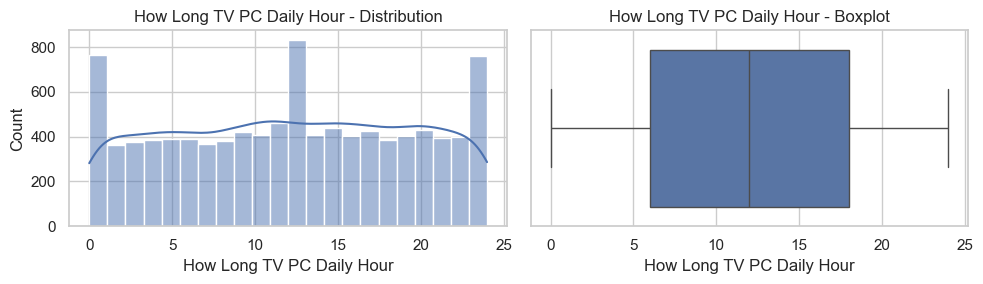

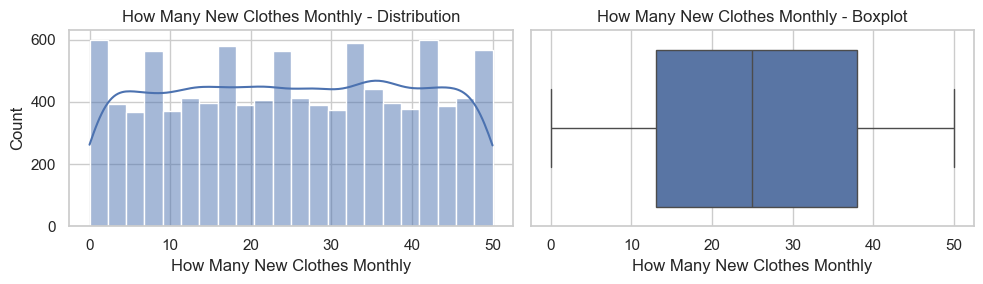

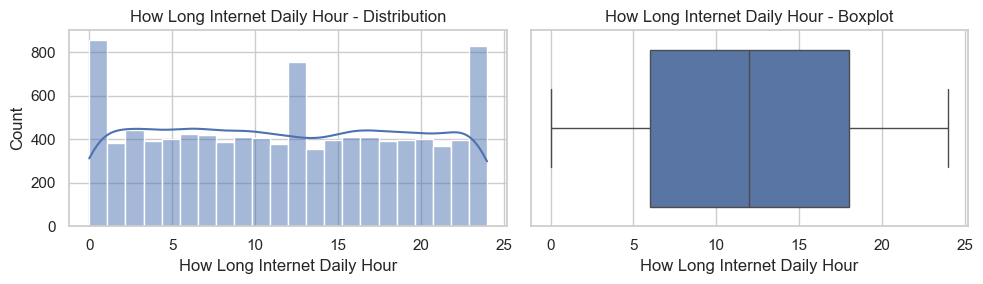

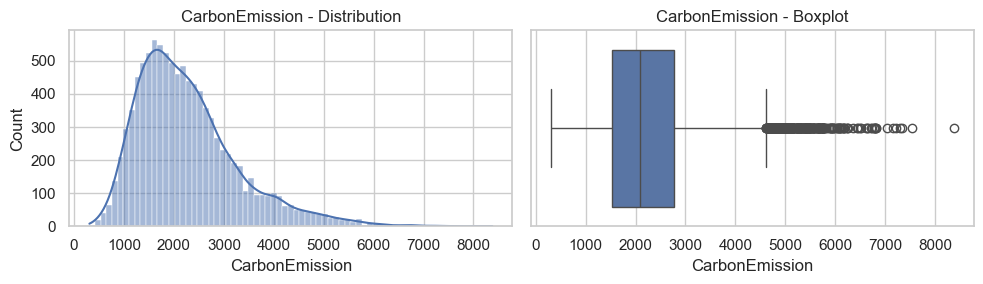

In [8]:
numerical_features=[
    "Monthly Grocery Bill","Vehicle Monthly Distance Km","Waste Bag Weekly Count","How Long TV PC Daily Hour",
    "How Many New Clothes Monthly","How Long Internet Daily Hour","CarbonEmission"
]

for feature in numerical_features:
    fig, axs=plt.subplots(1,2, figsize=(10,3))
    sns.histplot(df[feature],ax=axs[0], kde=True)
    sns.boxplot(x=df[feature], ax=axs[1])
    axs[0].set_title(f"{feature} - Distribution")
    axs[1].set_title(f"{feature} - Boxplot")
    plt.tight_layout()
    plt.show()

##### Correlation Map


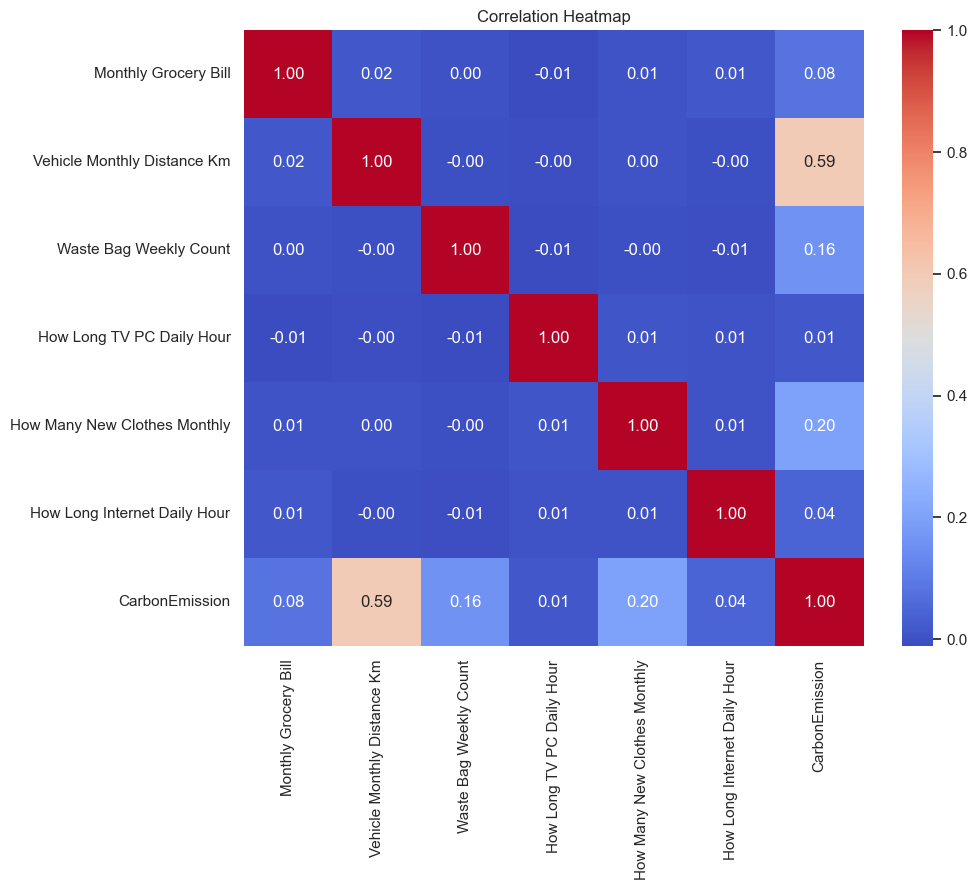

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### Pairplots

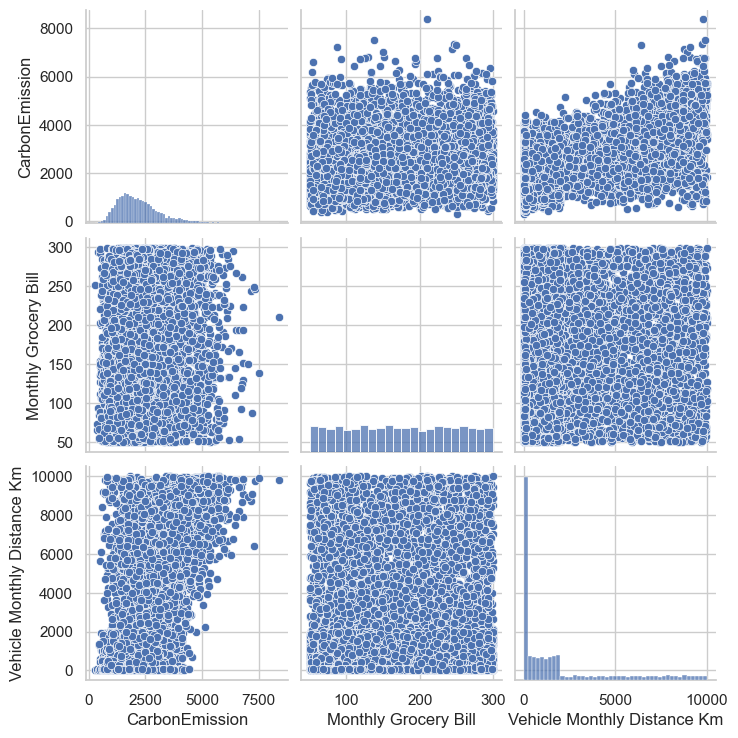

In [10]:
sns.pairplot(df[['CarbonEmission', 'Monthly Grocery Bill', 'Vehicle Monthly Distance Km']])


##### Group Based Insights

In [11]:
df.groupby('Diet')['CarbonEmission'].mean().sort_values(ascending=False)


Diet
omnivore       2391.980738
pescatarian    2251.835552
vegetarian     2216.814408
vegan          2215.761314
Name: CarbonEmission, dtype: float64

In [12]:
df.groupby('Vehicle Type')['CarbonEmission'].mean().sort_values(ascending=False)

Vehicle Type
petrol      3749.887172
lpg         3352.063128
diesel      3230.204180
hybrid      2708.500000
electric    1883.293592
Name: CarbonEmission, dtype: float64

In [13]:
df.groupby('Waste Bag Size')['CarbonEmission'].mean().sort_values(ascending=False)

Waste Bag Size
extra large    2452.745200
large          2343.165134
medium         2219.065481
small          2063.123168
Name: CarbonEmission, dtype: float64